<a href="https://colab.research.google.com/github/piyush1856/Business-Case-Walmart---Confidence-Interval-and-CLT/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **Background**

Walmart is a leading multinational retail corporation that operates a chain of supercenters, discount department stores, and grocery stores. The company serves over 100 million customers globally, and during high-demand events like Black Friday, they see large volumes of customer transactions. Understanding customer purchase behavior, particularly the amount spent, can help Walmart make strategic decisions to enhance customer satisfaction, drive sales, and improve operations.

## **Business Problem**

Walmart Inc., a global retail leader, aims to analyze customer purchase behavior, specifically focusing on **Black Friday sales**. The management seeks to derive insights into the following:

- **Gender-based spending habits**: Do women spend more than men during Black Friday sales?
- **Impact of demographic factors**: How do factors like **age**, **marital status**, and **city category** influence customer spending?

The results from this analysis will help Walmart:
- Optimize their promotional strategies.
- Tailor marketing efforts based on gender and demographic insights.
- Improve customer satisfaction by addressing specific purchase patterns.

The dataset contains detailed transactional data from customers who shopped during Black Friday at Walmart, and the analysis will employ **Confidence Intervals (CI)** and the **Central Limit Theorem (CLT)** to make reliable inferences from sample data.


## **Objective**

The primary objective of this case study is to analyze customer purchase behavior during Black Friday at Walmart to gain insights into spending patterns and demographic influences. Specifically, the objectives are:

1. **Analyze Gender-Based Spending Patterns:**
   - Determine if there is a significant difference in the amount spent by male and female customers.
   - Calculate and compare confidence intervals for average spending between genders to assess any notable differences.

2. **Examine the Impact of Demographic Factors:**
   - Investigate how factors such as age, marital status, and city category affect customer spending.
   - Utilize confidence intervals and the Central Limit Theorem (CLT) to understand spending behaviors across different demographic segments.

3. **Detect and Handle Data Issues:**
   - Identify and address any null values and outliers in the dataset that may impact the analysis.
   - Ensure data quality and accuracy through appropriate preprocessing steps.

4. **Generate Actionable Insights:**
   - Provide recommendations for Walmart based on the analysis to optimize promotional strategies and marketing efforts.
   - Suggest improvements to enhance customer satisfaction and operational efficiency based on observed spending patterns.

By achieving these objectives, the analysis aims to provide Walmart with valuable insights to refine their sales strategies and better cater to their diverse customer base during high-demand events.


## **Dataset Description**

The dataset provided for this case study includes transactional data from Walmart customers who shopped during Black Friday. The data is essential for analyzing customer purchase behavior and deriving actionable insights. Below is a description of the dataset and its features:

1. **User_ID:**
   - **Description:** Unique identifier for each customer.
   - **Type:** Integer

2. **Product_ID:**
   - **Description:** Unique identifier for each product.
   - **Type:** Object (String)

3. **Gender:**
   - **Description:** Gender of the customer (e.g., Male, Female).
   - **Type:** Object (String)

4. **Age:**
   - **Description:** Age group of the customer, binned into categories (e.g., 0-17, 18-25, 26-35, 36-50, 51+).
   - **Type:** Object (String)

5. **Occupation:**
   - **Description:** Occupation of the customer (masked for privacy).
   - **Type:** Integer

6. **City_Category:**
   - **Description:** Category of the city where the customer resides (e.g., A, B, C).
   - **Type:** Object (String)

7. **Stay_In_Current_City_Years:**
   - **Description:** Number of years the customer has lived in their current city.
   - **Type:** Object (String)

8. **Marital_Status:**
   - **Description:** Marital status of the customer (e.g., Married, Single).
   - **Type:** Integer

9. **Product_Category:**
   - **Description:** Category of the purchased product (masked for privacy).
   - **Type:** Integer

10. **Purchase:**
    - **Description:** Amount spent by the customer during the transaction.
    - **Type:** Integer


## **Approach**

The approach to analyzing Walmart's Black Friday customer spending data is designed to address the specific business problem outlined: comparing spending behavior between genders, marital statuses, and age groups. The following steps detail how to systematically approach this analysis:

1. **Data Import and Initial Exploration**

   - **Import Libraries and Dataset:**
     - Import essential libraries such as Pandas, NumPy, Matplotlib, and Seaborn.
     - Load the `walmart_data.csv` dataset into a Pandas DataFrame.

   - **Inspect Dataset:**
     - Use the `.info()` method to check the dataset structure, including the data types and non-null counts.
     - Review the first few rows with `.head()` to get an understanding of the data.

2. **Data Cleaning and Preprocessing**

   - **Handle Missing Values:**
     - Confirm the dataset has no missing values using `.isnull().sum()` to ensure data completeness.
  
   - **Handle Duplicate Records:**
     - Confirm the dataset has no duplicate records.
   
   - **Handle Data Types:**
     - Confirm the dataset has suitable data type as per business problem.

   - **Detect and Handle Outliers:**
     - Identify outliers in the `Purchase` column using boxplots.
     - Apply methods such as clipping or removing extreme values to manage outliers.

3. **Exploratory Data Analysis (EDA)**

   - **Univariate Analysis:**
     - Examine the distribution of spending amounts with histograms or boxplots.
     - Analyze the spending patterns for different `Gender`, `Marital_Status`, and `Age` groups using descriptive statistics.

   - **Bivariate Analysis:**
     - Compare average spending between genders, marital statuses, and age groups.
     - Use visualizations such as bar plots and scatter plots to explore relationships and differences.

4. **Statistical Analysis**

   - **Confidence Intervals (CI) and Central Limit Theorem (CLT):**
     - Calculate 95% confidence intervals for average spending for each gender, marital status, and age group.
     - Use the CLT to assess how sample size affects these intervals and their accuracy.
     - Compare confidence intervals to determine if they overlap between different groups.

5. **Visualization and Reporting**

   - **Visualize Results:**
     - Create visualizations to clearly represent the findings, including confidence intervals and comparisons between groups.
     - Use plots to show how spending behavior varies by gender, marital status, and age.

   - **Report Findings:**
     - Summarize the key insights from the analysis, including any significant differences in spending behavior.
     - Provide actionable recommendations based on the analysis, such as targeted marketing strategies or promotional adjustments.

This approach ensures a comprehensive analysis of customer spending behavior during Black Friday, addressing the business problem and providing valuable insights for Walmart’s decision-making.


# **Data Import and Initial Exploration**

## **Import Libraries and Dataset**

In [182]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot


# Statistical analysis
from scipy import stats
!pip install pingouin
import pingouin as pg

# Display settings for better readability of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the style for plots
sns.set(style="whitegrid")

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [183]:
# Reading the CSV file from the provided URL
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'
df = pd.read_csv(url)

## **Inspect Dataset**

In [184]:
# Displaying the first few rows of the dataset to check the structure
df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
123892,1001141,P00163242,F,26-35,3,B,1,1,1,8168
348001,1005600,P00343042,F,46-50,0,C,1,0,5,3506
386049,1005426,P00058042,M,26-35,14,C,1,0,8,9699
391161,1000187,P00267742,F,46-50,1,B,1,0,5,7024
546308,1000572,P00375436,M,18-25,4,A,0,0,20,129
432729,1000640,P00148642,M,18-25,4,C,2,1,6,20346
13850,1002062,P00310342,M,18-25,4,C,2,0,6,20538
143464,1004100,P00352242,M,55+,6,C,1,0,1,11429
350628,1006014,P00031042,M,46-50,1,C,0,1,8,7873
443114,1002130,P00306142,M,46-50,0,C,2,1,5,5268


### **Shape**

In [185]:
# Shape of data
df.shape

(550068, 10)

### **Overview**

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### **Data Types**

In [187]:
# information about datatype of dataset
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


# **Data Cleaning and Preprocessing**

## **Handle Missing Values**

In [188]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,User_ID,0
1,Product_ID,0
2,Gender,0
3,Age,0
4,Occupation,0
5,City_Category,0
6,Stay_In_Current_City_Years,0
7,Marital_Status,0
8,Product_Category,0
9,Purchase,0


#### **Inference:**

- The dataset contains **no missing values** across any of the columns.

## **Handle Duplicate Records**

In [189]:
# Checking the number of duplicate
duplicate_records = df[df.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

Number of duplicate records: 0


#### **Inference:**

- The dataset contains **0 duplicate records**, meaning there are no redundant rows in the dataset.

## **Handle Data Types**

In [190]:
# Changing data type of columns
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.dtypes

,0
User_ID,category
Product_ID,category
Gender,category
Age,category
Occupation,category
City_Category,category
Stay_In_Current_City_Years,category
Marital_Status,category
Product_Category,category
Purchase,int64


#### **Inference:**

- **Categorical Variables:**
  - **User_ID**: Serves as a unique identifier for customers.
  - **Product_ID**: Serves as a unique identifier for products.
  - **Gender**: Represents customer gender, with categories 'Male' and 'Female'.
  - **Age**: Represents age groups, such as '0-17', '18-25', '26-35', etc.
  - **Occupation**: Represents job categories or roles.
  - **City_Category**: Represents city categories (e.g., A, B, C).
  - **Stay_In_Current_City_Years**: Represents the number of years a customer has stayed in their current city.
  - **Marital_Status**: Represents marital status, categorized into 'Married' and 'Single'.
  - **Product_Category**: Represents different product categories.

- **Numerical Variable:**
  - **Purchase**: Represents the amount spent by the customer, recorded as a numerical value.

The dataset primarily consists of categorical variables which facilitate segmented analysis, while the numerical `Purchase` variable enables detailed quantitative analysis of spending behaviors.


## **Detect and Handle Outliers**

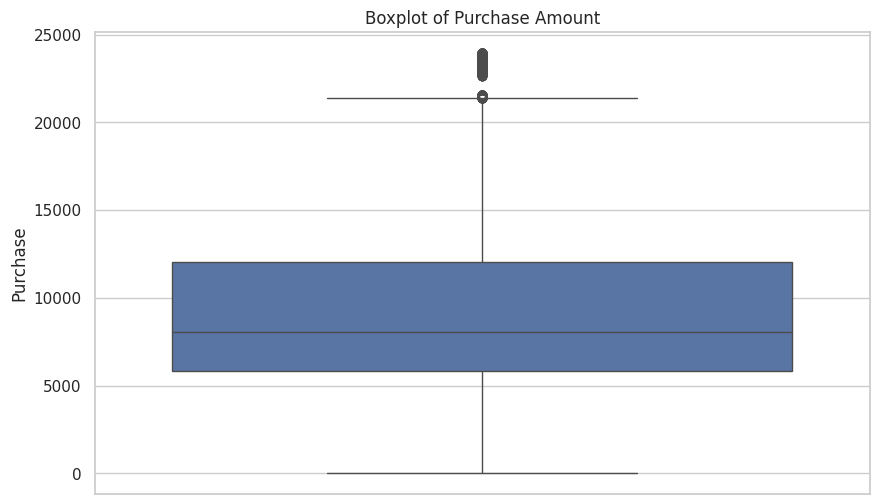

In [191]:
# Detect Outliers in `Purchase` coloumn Using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Purchase'], showfliers=True)
plt.title('Boxplot of Purchase Amount')
plt.show()

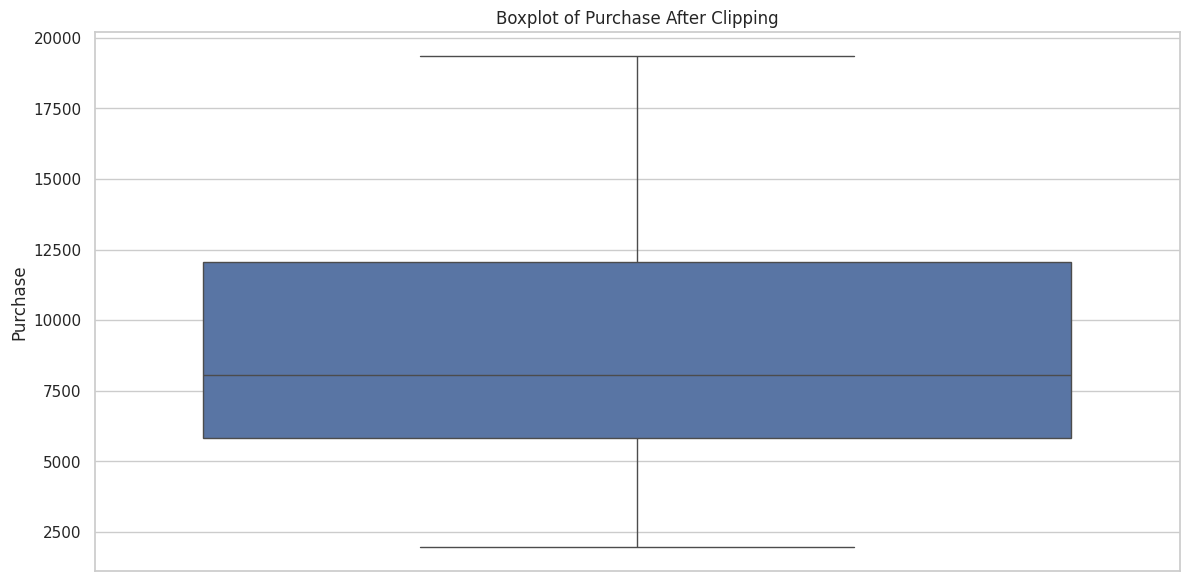

In [192]:
# Calculate 5th and 95th percentiles for 'Purchase'
lower_bound = np.percentile(df['Purchase'], 5)
upper_bound = np.percentile(df['Purchase'], 95)

# Clip the 'Purchase' column data
df['Purchase'] = np.clip(df['Purchase'], lower_bound, upper_bound)

# Confirm changes
plt.figure(figsize=(14, 7))
sns.boxplot(y=df['Purchase'], showfliers=True)
plt.title('Boxplot of Purchase After Clipping')
plt.show()

# **Statistical Summary**


In [193]:
# For measurable quantities
df.describe()

,Purchase
count,550068.000000
mean,9256.710489
std,4855.947166
min,1984.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,19336.000000


#### **Inference:**

- **Purchase:**
  - **Mean:** 9256.71
  - **Standard Deviation:** 4855.95
  - **Range:** 1984 to 19336
  - The mean purchase amount is 9256.71 with a standard deviation of 4855.95. This indicates significant variability in spending, with purchase amounts ranging from 1984 to 19336.


In [194]:
# Description for coloumn with 'category' datatype
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


#### **Inference:**

- **User_ID:**
  - **Unique Values:** 5891
  - **Most Frequent Value:** 1001680 (occurs 1026 times)
  - The `User_ID` column contains 5891 unique identifiers. The most frequent user ID appears 1026 times, reflecting a mix of repeat and unique users.

- **Product_ID:**
  - **Unique Values:** 3631
  - **Most Frequent Value:** P00265242 (occurs 1880 times)
  - The `Product_ID` column has 3631 unique product identifiers. The most frequently purchased product ID is P00265242, indicating its popularity among customers.

- **Gender:**
  - **Unique Values:** 2
  - **Most Frequent Value:** M (414259 occurrences)
  - The `Gender` column shows 2 unique values, with males (M) being the most frequent, representing a majority of the dataset.

- **Age:**
  - **Unique Values:** 7
  - **Most Frequent Value:** 26-35 (219587 occurrences)
  - The `Age` column includes 7 unique age groups. The age group 26-35 is the most prevalent, highlighting a significant customer base in this range.

- **Occupation:**
  - **Unique Values:** 21
  - **Most Frequent Value:** 4 (occurs 72308 times)
  - The `Occupation` column has 21 unique occupation codes. The code 4 is the most frequent, suggesting it is a common occupation among customers.

- **City_Category:**
  - **Unique Values:** 3
  - **Most Frequent Value:** B (231173 occurrences)
  - The `City_Category` column has 3 unique city categories. Category B is the most frequent, indicating a higher number of transactions from this city category.

- **Stay_In_Current_City_Years:**
  - **Unique Values:** 5
  - **Most Frequent Value:** 1 (193821 occurrences)
  - The `Stay_In_Current_City_Years` column has 5 unique values. The value 1 year is the most common, showing that many customers have stayed in their current city for this duration.

- **Marital_Status:**
  - **Unique Values:** 2
  - **Most Frequent Value:** 0 (324731 occurrences)
  - The `Marital_Status` column has 2 unique values. The status 0 (likely representing single) is the most frequent, suggesting a higher number of single individuals among the customers.

- **Product_Category:**
  - **Unique Values:** 20
  - **Most Frequent Value:** 5 (150933 occurrences)
  - The `Product_Category` column contains 20 unique categories. Category 5 is the most common, indicating its popularity among customers.


# **Exploratory Data Analysis (EDA)**

## **What products categories are different age groups buying the most?**




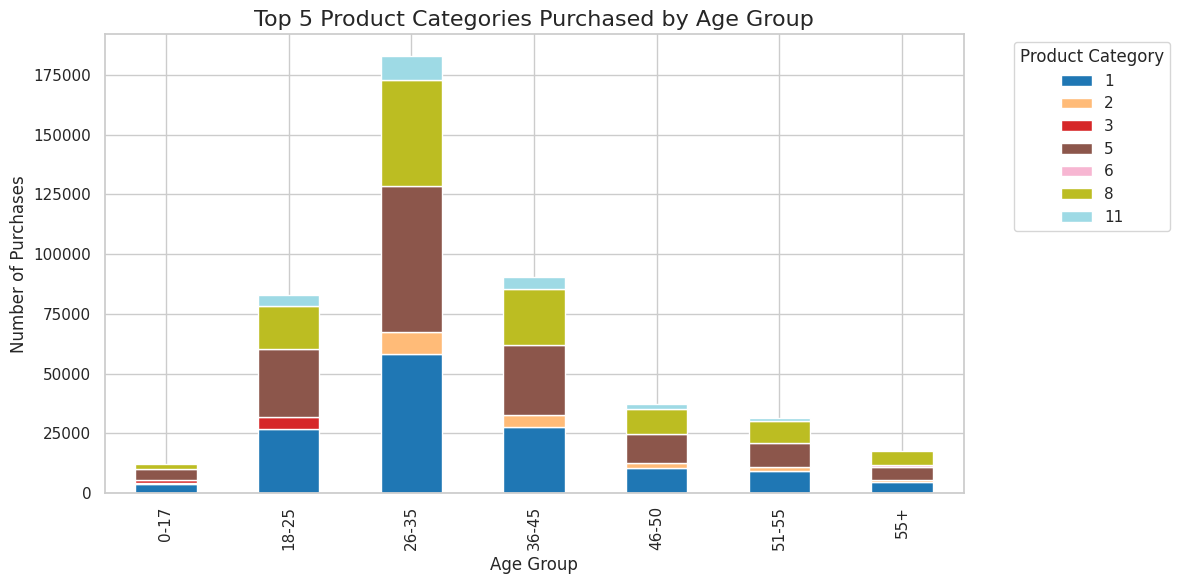

In [195]:
# Create a cross-tabulation between Age and Product_Category
age_product = pd.crosstab(df['Age'], df['Product_Category'])

# Sort each row by the frequency of product category purchases and select top 5
age_product_top5 = age_product.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)

# Drop any NaN values created by selecting top 5
age_product_top5 = age_product_top5.dropna(axis=1, how='all')

# Plot a stacked bar chart for the top 5 product categories per age group
age_product_top5.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Adding plot labels and title
plt.title('Top 5 Product Categories Purchased by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### **Inference:**

- **Age 26-35:**
  - This group has the highest number of purchases overall, with a strong preference for Product Category 1, followed by significant interest in Product Categories 5 and 8.
  - This demographic represents a prime target market for many products.

- **Age 18-25 and Age 36-45:**
  - Both of these groups also exhibit a high volume of purchases, with similar preferences for Product Category 1 and Category 5.
  - However, the total number of purchases for these groups is significantly lower compared to the 26-35 age group.

- **Age 0-17:**
  - The number of purchases in this age group is minimal compared to the others, but there is a balanced spread across product categories.

- **Older Age Groups (46-50, 51-55, 55+):**
  - There is a sharp decline in the number of purchases for individuals over 45 years old. The older the age group, the fewer the purchases.
  - They still show a preference for Product Categories 1 and 5, but the volume is significantly smaller.

#### **Recommendations:**

- **Focus on the 26-35 Age Group:**
  - This demographic should be the primary target for marketing efforts, particularly for Product Categories 1, 5, and 8, as they are highly engaged and spend more.

- **Expand Efforts to 18-45:**
  - While the 26-35 group is the largest, the 18-25 and 36-45 age groups also demonstrate substantial purchasing power. Tailoring campaigns to these groups could yield higher returns.

- **Targeted Marketing for Older Age Groups:**
  - Given the low purchase numbers from the 46+ age groups, a different approach might be required. Consider more age-appropriate marketing, promotions, or product offerings to engage this demographic.

- **New Opportunities for Age 0-17:**
  - While purchases are lower, this group shows diversity in product preference. Companies could explore offering products or services geared specifically toward younger audiences, perhaps with parental influence in mind.


## **What products ID are different age groups buying the most?**

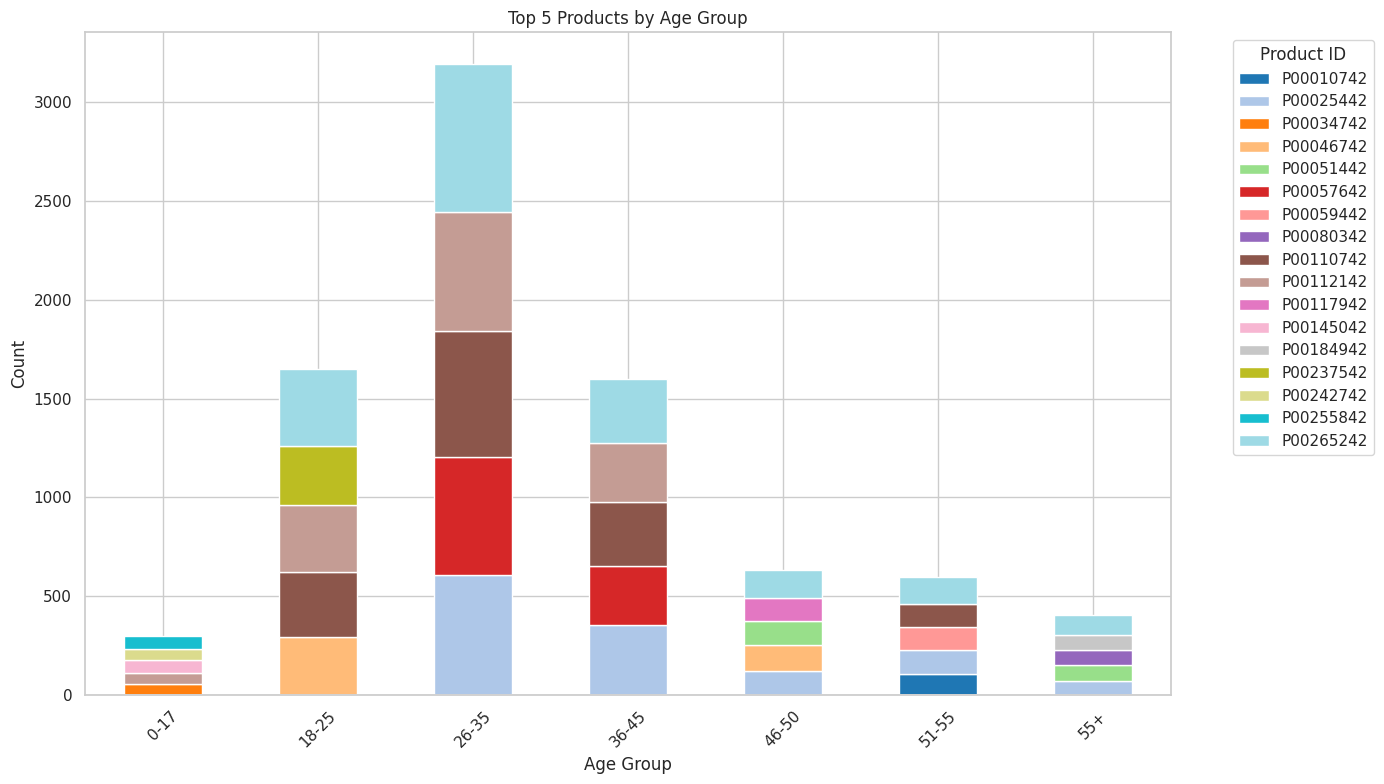

In [196]:
# Step 1: Create a DataFrame that counts occurrences of each Product_ID by Age group
product_age_counts = df.groupby(['Age', 'Product_ID']).size().reset_index(name='Count')

# Step 2: Get the top 5 products for each age group
top_products_by_age = (product_age_counts
                       .sort_values(['Age', 'Count'], ascending=[True, False])
                       .groupby('Age')
                       .head(5))

# Pivot to get the Age groups on the x-axis and Product_IDs as different bars
pivot_table = top_products_by_age.pivot_table(index='Age', columns='Product_ID', values='Count', fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))

# Use a bar plot with multiple bars for each age group
pivot_table.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Adding plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Top 5 Products by Age Group')
plt.xticks(rotation=45)

# Adding legend
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### **Inference:**

- **Age Group 26-35:**
  - This group has the highest number of purchases across all age groups, with Product ID P00265442 being the most popular.
  - Other frequently purchased products in this group include P00145042, P00112142, and P00110742.
  - This age group is a significant driver of sales volume for top products.

- **Age Group 18-25:**
  - Product ID P00265442 is also highly popular in this age group, followed by P00145042 and P00112142.
  - While purchases are fewer than the 26-35 group, this segment still plays a considerable role in driving sales for these top products.

- **Age Group 36-45:**
  - The purchasing volume is moderate in this group, with a notable preference for P00265442 and P00145042.
  - This group purchases fewer products compared to the 26-35 and 18-25 groups but still has a distinct preference for the same high-demand products.

- **Older Age Groups (46-50, 51-55, and 55+):**
  - Purchases in these groups are considerably lower, but they still show a consistent preference for P00265442, P00145042, and P00110742.
  - Although smaller in volume, these groups tend to purchase products that are also popular in younger demographics.

- **Age Group 0-17:**
  - This age group has the fewest purchases, and the product variety is limited. However, P00145042 and P00110742 appear to have some presence in this group as well.

#### **Recommendations:**

- **Focus on Product ID P00265442:**
  - Given its popularity across almost all age groups, this product should be prioritized for marketing and promotional efforts. Special campaigns targeting the 26-35 and 18-25 age groups could drive more sales.

- **Product Diversification:**
  - While the top products are popular, there’s a notable concentration on a few products (e.g., P00265442, P00145042). Introducing new or similar products could capture a wider share of the market, especially for the 36-45 and older age groups.

- **Retargeting Campaigns for Age 36-45:**
  - Since this group still demonstrates purchasing power for the same top products, creating tailored campaigns for this segment could help increase sales.

- **Age-Specific Marketing:**
  - **Younger Age Groups (18-35):** As they are already purchasing heavily, continue focusing marketing efforts on the most popular products, particularly P00265442.
  - **Older Age Groups (46+):** Although they purchase less frequently, targeted campaigns offering product bundles, discounts, or loyalty rewards may help boost sales.
  - **Boosting Sales for Age 0-17:** Explore promoting products that cater specifically to a younger audience (or those purchased by parents), as there is minimal product engagement currently.


## **Is there a relationship between age, marital status, and the amount spent ?**

<Figure size 1200x800 with 0 Axes>

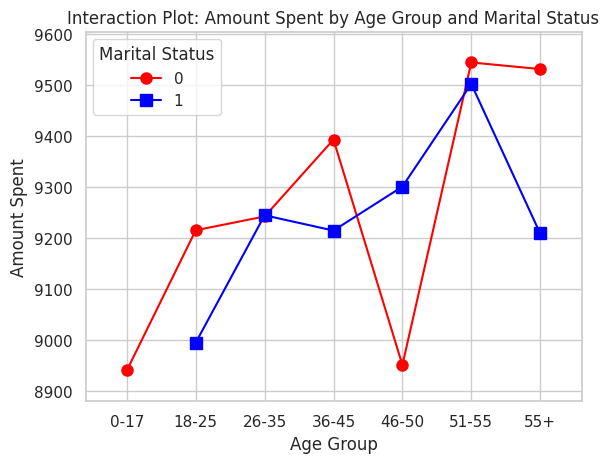

In [197]:
# Make a copy of the DataFrame
df_copy = df.copy()

# Change the datatype of specific columns to string
df_copy['Age'] = df_copy['Age'].astype(str)
df_copy['Marital_Status'] = df_copy['Marital_Status'].astype(str)

# Define a list of colors and markers (2 for each unique level)
colors = ['red', 'blue']
markers = ['o', 's']

# Create the interaction plot
fig = plt.figure(figsize=(12, 8))
interaction_plot(df_copy['Age'], df_copy['Marital_Status'], df_copy['Purchase'],
                  colors=colors,
                  markers=markers,
                  ms=8)

# Add axis labels and a title
plt.xlabel("Age Group")
plt.ylabel("Amount Spent")
plt.title("Interaction Plot: Amount Spent by Age Group and Marital Status")

# Add legend
plt.legend(title='Marital Status', loc='upper left')

plt.show()


#### **Inference:**

- **Age Group and Spending:**
  - **Younger Age Groups:** Generally, younger age groups (0-17, 18-25) spend less compared to older age groups.
  - **Middle-Aged Groups:** The 26-35 age group shows a notable increase in spending, which continues for the 36-45 age group.
  - **Older Age Groups:** Spending levels slightly decrease in the 46-50 age group, increase for the 51-55 age group, and show a slight decrease again in the 55+ age group.

- **Marital Status and Spending:**
  - **Married Individuals (Marital Status 1):** Spend more across all age groups compared to unmarried individuals (Marital Status 0).
  - **Unmarried Individuals:** Exhibit relatively lower spending patterns across all age groups.

- **Interaction Effect:**
  - The interaction between age group and marital status is evident. The spending difference between married and unmarried individuals is more pronounced in middle-aged groups (26-35, 36-45) compared to younger or older age groups.

#### **Recommendations:**

- **Target Marketing:**
  - **Middle-Aged Groups:** Focus marketing efforts on the 26-35 and 36-45 age groups due to their significant spending potential.
  - **Married Individuals:** Develop marketing campaigns tailored specifically to married individuals, who tend to spend more.

- **Product Offerings:**
  - **Younger Age Groups:** Offer products or services catering to the needs of younger individuals, such as budget-friendly options or trendy items.
  - **Older Age Groups:** Create products or services that address the unique needs of older age groups, like health and wellness products or retirement planning tools.

- **Loyalty Programs:**
  - Implement loyalty programs to reward repeat customers, especially among the middle-aged and married segments, to encourage continued spending and foster brand loyalty.

- **Customer Insights:**
  - Conduct additional research to gain deeper insights into spending patterns among different age groups and marital statuses. This can help refine marketing strategies and product offerings.

## **Are there preferred product categories for different genders ?**

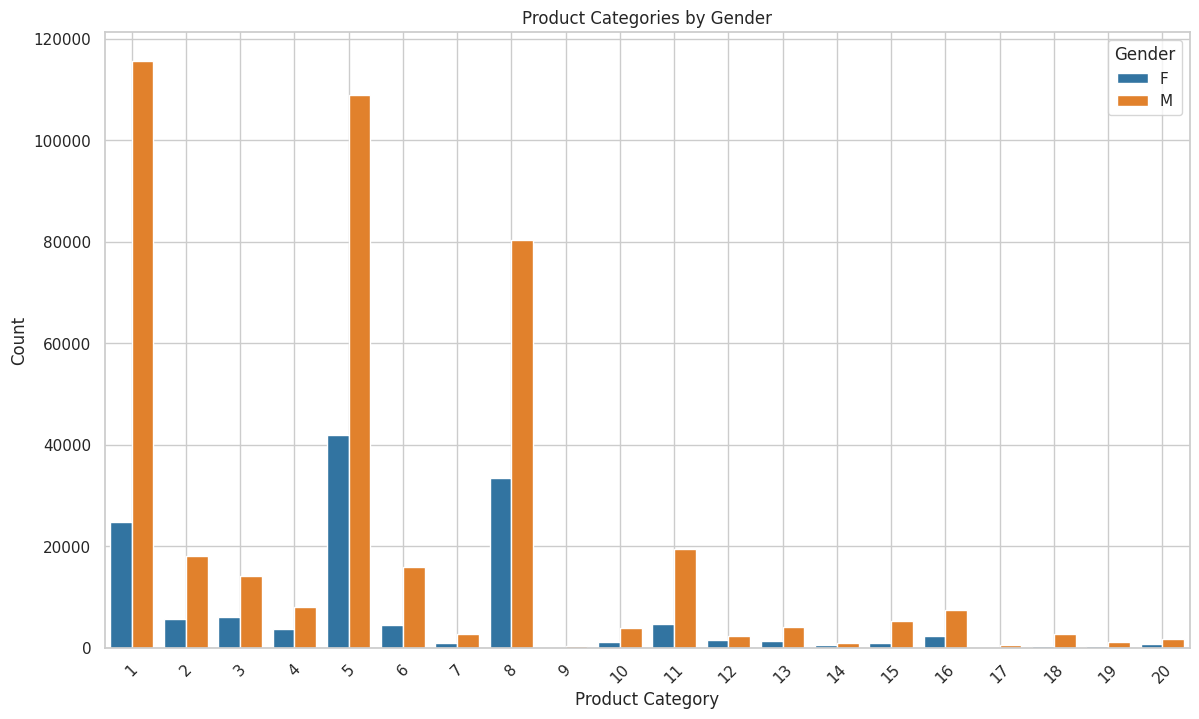

In [198]:
# Count occurrences of each Product_Category by Gender
product_gender_counts = df.groupby(['Product_Category', 'Gender']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=product_gender_counts, x='Product_Category', y='Count', hue='Gender', palette='tab10')

plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Categories by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

#### **Inferences :**
- **Product Categories with Highest Count:**
  - Product Category 1 has the highest count for both genders (Female and Male).
  - Female customers significantly outnumber male customers in this category.
  - Categories 2, 3, and 4 also show relatively high counts for Female customers.

- **Lowest Counts:**
  - Categories 17 through 19 have the lowest counts for both genders.

#### **Recommendations :**
- **Marketing Focus:**
  - **Leverage Category 1:** Since it has the highest count across both genders, allocate marketing efforts to promote products in this category.
  - **Explore Other High-Count Categories:** Investigate why Categories 2, 3, and 4 are also popular among Female customers. Consider targeted marketing strategies for these categories.

- **Low-Count Categories:**
  - **Evaluate Categories 17-19:** Understand why these categories have low counts. If they consistently underperform, consider discontinuing them.

- **Gender-Specific Strategies:**
  - **Balance Representation:** Explore growth opportunities in categories where one gender significantly outnumbers the other. Aim for a more balanced representation.
  - **Customize Marketing:** Tailor marketing messages based on gender preferences within each category.


# **Statistical Analysis**

## **Confidence Intervals (CI) and Central Limit Theorem (CLT)**

### **How does gender affect the amount spent ?**

In [199]:
def plot_single_sample_gender(df, sample_sizes, ci):
    """
    Plot KDE distributions and confidence intervals for different sample sizes based on Gender.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Gender' and 'Purchase' columns.
    sample_sizes (list): List of sample sizes to be used for bootstrapping.
    ci (int): The confidence interval level (e.g., 90, 95, 99).
    """
    # Define color codes
    color_male = "#3A7089"
    color_female = "#4b4b4c"

    # Initialize lists to store means for different sample sizes
    male_means_list = []
    female_means_list = []

    for sample_size in sample_sizes:
        # Extract purchase amounts based on gender
        df_male = df.loc[df['Gender'] == 'M', 'Purchase']
        df_female = df.loc[df['Gender'] == 'F', 'Purchase']

        # Number of bootstrap samples
        bootstrap_samples = 20000

        # Lists to hold sample means
        male_means = []
        female_means = []

        # Generate bootstrap samples and compute means
        for _ in range(bootstrap_samples):
            male_sample = np.random.choice(df_male, size=sample_size, replace=True)
            female_sample = np.random.choice(df_female, size=sample_size, replace=True)

            male_means.append(np.mean(male_sample))
            female_means.append(np.mean(female_sample))

        male_means_list.append(male_means)
        female_means_list.append(female_means)

    # Create a figure with vertical subplots (one row per sample size)
    fig, axs = plt.subplots(len(sample_sizes), 1, figsize=(12, 10), sharex=True)

    # Plot KDE distributions and confidence intervals for each sample size
    for i, (male_means, female_means, ax) in enumerate(zip(male_means_list, female_means_list, axs)):
        temp_df = pd.DataFrame({'male_means': male_means, 'female_means': female_means})

        # Plot KDE distributions
        sns.kdeplot(temp_df['male_means'], color=color_male, fill=True, alpha=0.5, label='Male', ax=ax)
        sns.kdeplot(temp_df['female_means'], color=color_female, fill=True, alpha=0.5, label='Female', ax=ax)

        # Calculate and plot confidence intervals
        l_ci = (100 - ci) / 2
        u_ci = (100 + ci) / 2
        m_range = np.percentile(male_means, [l_ci, u_ci])
        f_range = np.percentile(female_means, [l_ci, u_ci])

        ax.axvline(m_range[0], ymax=0.9, color=color_male, linestyle='--')
        ax.axvline(m_range[1], ymax=0.9, color=color_male, linestyle='--')
        ax.axvline(f_range[0], ymax=0.9, color=color_female, linestyle='--')
        ax.axvline(f_range[1], ymax=0.9, color=color_female, linestyle='--')

        # Annotate the confidence intervals
        for k in m_range:
            ax.text(k, ax.get_ylim()[1] * 0.9, f'{k:.0f}', color=color_male, ha='center')
        for k in f_range:
            ax.text(k, ax.get_ylim()[1] * 0.9, f'{k:.0f}', color=color_female, ha='center')

        ax.set_title(f'Sample Size = {sample_sizes[i]}\nCI = {ci}%', fontsize=12, weight='bold')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True)

    # Set the x-axis label only once at the bottom of the plot
    axs[-1].set_xlabel('Mean Purchase Amount')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    return male_means_list, female_means_list

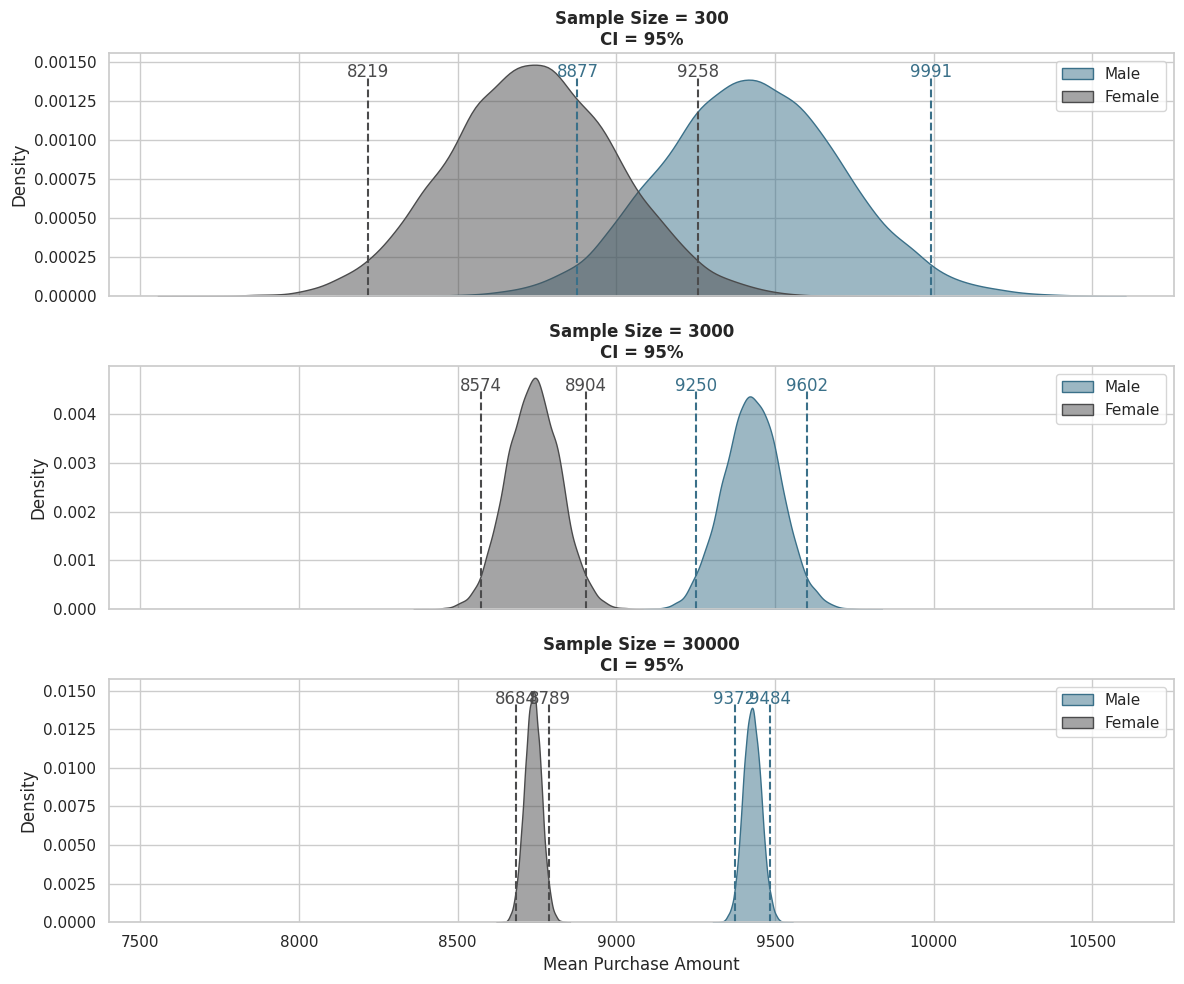

In [200]:
sample_sizes = [300, 3000, 30000]
male_means, female_means = plot_single_sample_gender(df, sample_sizes, 95)

#### **Is the confidence interval computed using the entire dataset wider for one of the genders ? Why is this the case ?**



> Yes, the confidence interval (CI) appears to be wider for males compared to females. This is likely due to greater variance or variability in the purchase amounts for males. When the data for a group has higher variability (i.e., the data points are more spread out), the confidence interval tends to be wider because we are less certain about the true mean of the population.



#### **How is the width of the confidence interval affected by the sample size ?**



> The width of the confidence interval decreases as the sample size increases. This is evident from the progression of the CIs as we move from a sample size of 300 to 3000 to 30,000. A larger sample size reduces the standard error of the mean, leading to a narrower confidence interval. This is consistent with the Central Limit Theorem, which states that as the sample size increases, the sampling distribution of the sample mean approaches a normal distribution with reduced variance.



#### **Do the confidence intervals for different sample sizes overlap ?**



> Yes, the confidence intervals for the different sample sizes do overlap, especially for the smaller sample sizes . As the sample size increases, the intervals become narrower and more distinct, but initially, the overlap indicates that there isn't a huge difference in the means of the two genders. The overlap is particularly noticeable for the male group in the smaller sample sizes.



#### **How does the sample size affect the shape of the distributions of the means ?**



> As the sample size increases, the distribution of the sample means becomes more peaked and narrow (i.e., more concentrated around the mean). This reflects reduced variability in the estimated mean purchase amounts. In the plot for a sample size of 30,000, the distributions are very narrow and centered, indicating that with larger sample sizes, the estimates of the mean are more precise and reliable. Conversely, for smaller sample sizes (e.g., 300), the distributions are more spread out, suggesting greater uncertainty in the estimate of the population mean.





### **How does Marital_Status affect the amount spent ?**

In [201]:
def plot_single_sample_marital_status(df, sample_sizes, ci):
    """
    Plot KDE distributions and confidence intervals for different sample sizes based on Marital Status.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Marital_Status' and 'Purchase' columns.
    sample_sizes (list): List of sample sizes to be used for bootstrapping.
    ci (int): The confidence interval level (e.g., 90, 95, 99).
    """
    # Define color codes
    color_single = "#3A7089"  # For Marital_Status = 0
    color_married = "#4b4b4c"  # For Marital_Status = 1

    # Initialize lists to store means for different sample sizes
    single_means_list = []
    married_means_list = []

    for sample_size in sample_sizes:
        # Dictionaries to hold sample means
        marital_means = {0: [], 1: []}

        # Extract purchase amounts based on marital status
        df_single = df.loc[df['Marital_Status'] == 0, 'Purchase']
        df_married = df.loc[df['Marital_Status'] == 1, 'Purchase']

        # Number of bootstrap samples
        bootstrap_samples = 20000

        # Generate bootstrap samples and compute means
        for _ in range(bootstrap_samples):
            single_sample = np.random.choice(df_single, size=sample_size, replace=True)
            married_sample = np.random.choice(df_married, size=sample_size, replace=True)

            marital_means[0].append(np.mean(single_sample))
            marital_means[1].append(np.mean(married_sample))

        single_means_list.append(marital_means[0])
        married_means_list.append(marital_means[1])

    # Create a figure with vertical subplots (one row per sample size)
    fig, axs = plt.subplots(len(sample_sizes), 1, figsize=(12, 10), sharex=True)

    # Plot KDE distributions and confidence intervals for each sample size
    for i, (single_means, married_means, ax) in enumerate(zip(single_means_list, married_means_list, axs)):
        temp_df = pd.DataFrame({'single_means': single_means, 'married_means': married_means})

        # Plot KDE distributions
        sns.kdeplot(temp_df['single_means'], color=color_single, fill=True, alpha=0.5, label='Single', ax=ax)
        sns.kdeplot(temp_df['married_means'], color=color_married, fill=True, alpha=0.5, label='Married', ax=ax)

        # Calculate and plot confidence intervals
        l_ci = (100 - ci) / 2
        u_ci = (100 + ci) / 2
        single_range = np.percentile(single_means, [l_ci, u_ci])
        married_range = np.percentile(married_means, [l_ci, u_ci])

        ax.axvline(single_range[0], ymax=0.9, color=color_single, linestyle='--')
        ax.axvline(single_range[1], ymax=0.9, color=color_single, linestyle='--')
        ax.axvline(married_range[0], ymax=0.9, color=color_married, linestyle='--')
        ax.axvline(married_range[1], ymax=0.9, color=color_married, linestyle='--')

        ax.set_title(f'Sample Size = {sample_sizes[i]}\nCI = {ci}%', fontsize=12, weight='bold')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True)

    # Set the x-axis label only once at the bottom of the plot
    axs[-1].set_xlabel('Mean Purchase Amount')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    return single_means_list, married_means_list

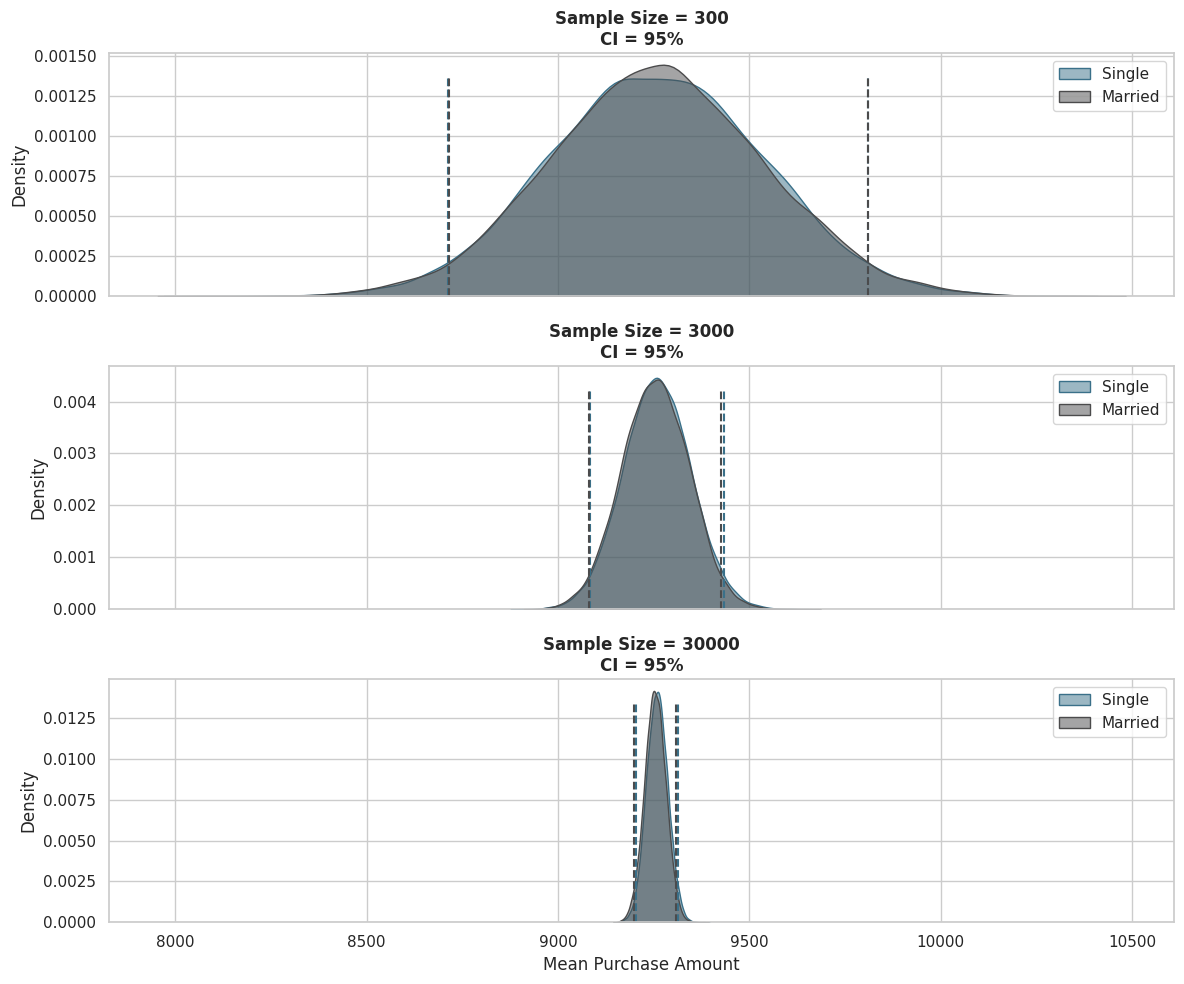

In [202]:
sample_sizes = [300, 3000, 30000]
single_means_list, married_means_list = plot_single_sample_marital_status(df, sample_sizes, 95)

#### **Is the confidence interval computed using the entire dataset wider for one of the marital statuses? Why is this the case ?**



> In the provided plot, the confidence intervals for Single and Married individuals are fairly similar, but the confidence interval for Single appears slightly wider in some cases, particularly in the smaller sample sizes (300 and 3000). This happens because the variability in purchase behavior may be higher for the Single group than for the Married group. More variability in the data leads to a wider confidence interval, reflecting greater uncertainty in estimating the true mean.



#### **How is the width of the confidence interval affected by the sample size ?**



> As the sample size increases, the confidence intervals become narrower for both groups. In the plot with a sample size of 300, the confidence intervals are the widest, while in the plot with a sample size of 30,000, the intervals are much tighter. This is due to the Central Limit Theorem: larger sample sizes provide more precise estimates of the mean, leading to smaller standard errors and, therefore, narrower confidence intervals.



#### **Do the confidence intervals for different sample sizes overlap ?**



> Yes, the confidence intervals for Single and Married individuals overlap in each of the three sample sizes (300, 3000, and 30,000). This indicates that there is not a significant difference in the mean purchase amounts between these two groups, and the overlap shows that the means are relatively close to each other, even though they are not exactly the same.



#### **How does the sample size affect the shape of the distributions of the means ?**



> As the sample size increases, the shape of the distribution becomes more concentrated and less spread out. In the plot with a sample size of 300, the distributions for both groups are wider and less peaked, showing more variability in the sample means. As the sample size increases to 3000 and 30,000, the distributions become sharper and narrower, indicating more precise estimates of the mean with less variability. This behavior is consistent with the Central Limit Theorem, where larger sample sizes lead to a more normal and narrower distribution around the true mean.



### **How does Age affect the amount spent?**

In [203]:
def plot_single_sample_age(df, sample_sizes, ci):
    """
    Plot KDE distributions and confidence intervals for different sample sizes based on Age.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Age' and 'Purchase' columns.
    sample_sizes (list): List of sample sizes to be used for bootstrapping.
    ci (int): The confidence interval level (e.g., 90, 95, 99).
    """
    # Define color codes for each age group
    age_colors = {
        '0-17': "#1f77b4",
        '18-25': "#ff7f0e",
        '26-35': "#2ca02c",
        '36-45': "#d62728",
        '46-50': "#9467bd",
        '51-55': "#8c564b",
        '55+': "#e377c2"
    }

    # Extract unique age groups
    age_groups = df['Age'].unique()

    # Initialize a list to store means for different sample sizes
    age_means_list = []

    for sample_size in sample_sizes:
        age_means = {age: [] for age in age_groups}

        for age in age_groups:
            df_age = df.loc[df['Age'] == age, 'Purchase']
            bootstrap_samples = 20000

            # Generate bootstrap samples and compute means
            for _ in range(bootstrap_samples):
                sample = np.random.choice(df_age, size=sample_size, replace=True)
                age_means[age].append(np.mean(sample))

        age_means_list.append(age_means)

    # Create a figure with vertical subplots (one row per sample size)
    fig, axs = plt.subplots(len(sample_sizes), 1, figsize=(12, 10), sharex=True)

    # Plot KDE distributions and confidence intervals for each sample size
    for i, (age_means, ax) in enumerate(zip(age_means_list, axs)):
        temp_df = pd.DataFrame(age_means)

        # Plot KDE distributions for each age group
        for age, color in age_colors.items():
            sns.kdeplot(temp_df[age], color=color, fill=True, alpha=0.4, label=age, ax=ax)

            # Calculate and plot confidence intervals
            l_ci = (100 - ci) / 2
            u_ci = (100 + ci) / 2
            age_range = np.percentile(age_means[age], [l_ci, u_ci])
            ax.axvline(age_range[0], ymax=0.9, color=color, linestyle='--')
            ax.axvline(age_range[1], ymax=0.9, color=color, linestyle='--')

        ax.set_title(f'Sample Size = {sample_sizes[i]}\nCI = {ci}%', fontsize=12, weight='bold')
        ax.set_ylabel('Density')
        ax.legend(title='Age Group')
        ax.grid(True)

    # Set the x-axis label only once at the bottom of the plot
    axs[-1].set_xlabel('Mean Purchase Amount')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    return age_means_list

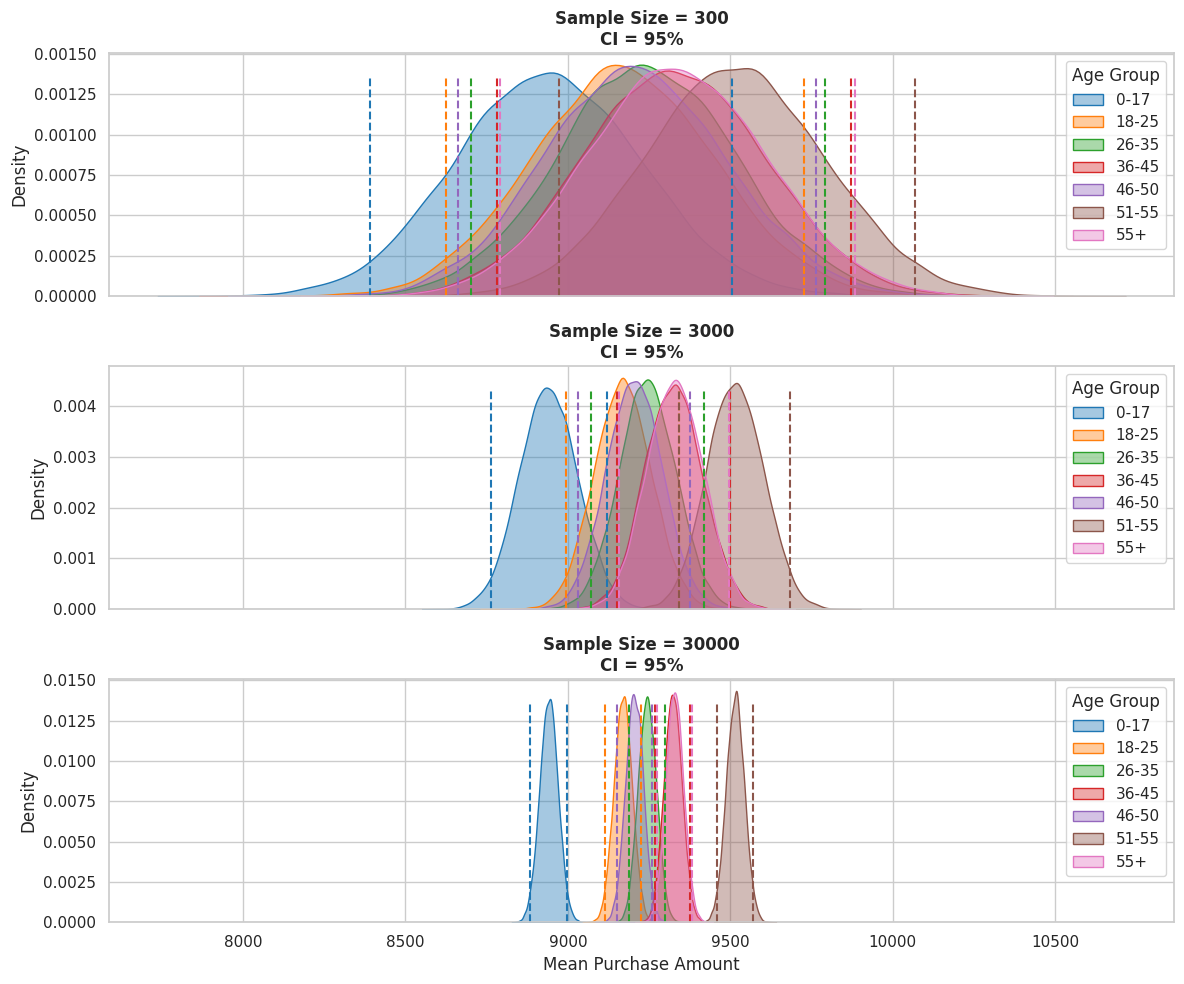

In [204]:
sample_sizes = [300, 3000, 30000]
age_means = plot_single_sample_age(df, sample_sizes, 95)

#### **Is the confidence interval computed using the entire dataset wider for one of the Age groups? Why is this the case ?**



> Yes, the confidence interval (CI) is wider for some age groups, particularly the older age groups (like 55+) and the younger age groups (like 0-17). This happens because the variance in purchasing amounts might be larger for these age groups or because they might have fewer data points (less representation in the dataset). When variability in data is higher, or the sample size is smaller for a specific group, the confidence interval will be wider. This reflects more uncertainty in estimating the true mean.



#### **How is the width of the confidence interval affected by the sample size ?**



> As the sample size increases, the width of the confidence interval decreases. This can be seen across the three subplots where the sample sizes are 300, 3000, and 30,000. In the first graph (sample size = 300), the CIs are much wider, indicating higher uncertainty. In the second graph (sample size = 3000), the CIs narrow down. In the third graph (sample size = 30,000), the CIs are the narrowest, showing a high level of confidence in the estimated mean.

> This happens because the CLT states that as sample size increases, the sampling distribution of the sample mean becomes more concentrated around the true population mean, reducing the standard error of the mean (and thus narrowing the confidence interval).



#### **Do the confidence intervals for different sample sizes overlap ?**



> Yes, the confidence intervals for different sample sizes overlap. This is expected because regardless of the sample size, the underlying distribution of the population should stay consistent. Even though smaller samples produce wider intervals, they still capture the true mean within their range, overlapping with the narrower CIs produced by larger sample sizes.



#### **How does the sample size affect the shape of the distributions of the means ?**



> The sample size has a significant effect on the shape of the distributions of the means. For smaller sample sizes (like 300), the distributions are wider and more spread out, indicating higher variability. As the sample size increases (moving to 3000 and 30,000), the distributions become more peaked and narrow, as the standard error of the mean decreases. Larger samples lead to a more precise estimate of the population mean, and the distribution of the means approaches a normal distribution according to the central limit theorem.



# **Visualization and Reporting**

## **Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

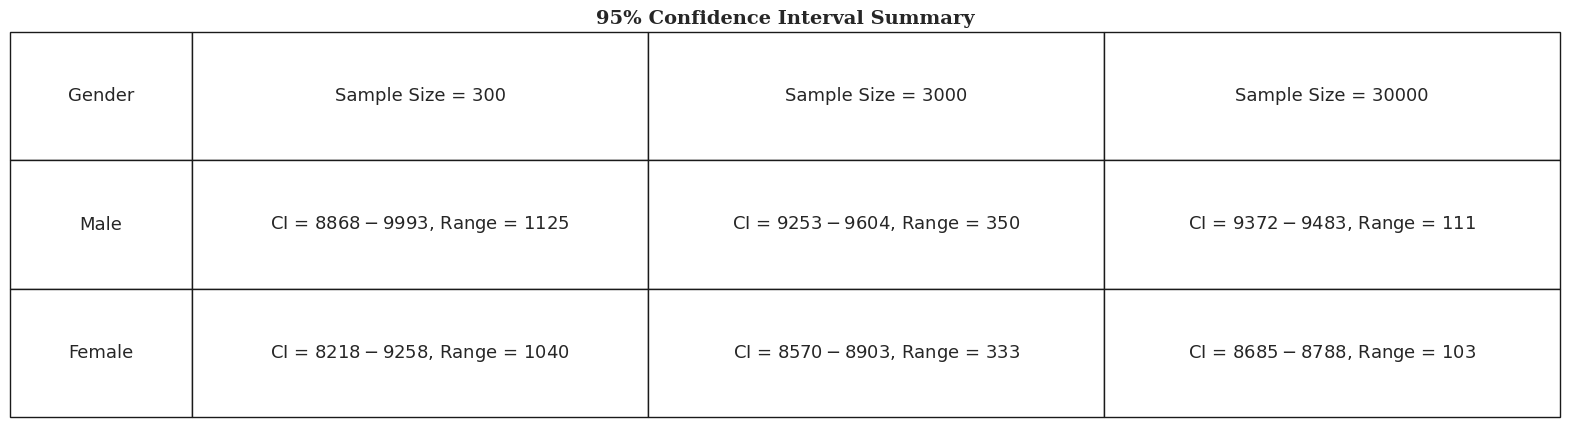

In [205]:
def confidence_interval(means, ci=95):
    """Calculate confidence interval using percentiles."""
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    return np.percentile(means, [lower_percentile, upper_percentile])

# List to store sample sizes
sample_sizes = [300, 3000, 30000]

# Generate 95% confidence interval table for male and female
fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 1)

# Prepare lists for male and female CI
m_ci = ['Male']  # Row for male confidence intervals
f_ci = ['Female']  # Row for female confidence intervals

# Calculate CI for each sample size for male and female
for i in range(len(sample_sizes)):
    # Male confidence intervals
    male_ci = confidence_interval(all_male_means[i], 95)
    male_range = male_ci[1] - male_ci[0]
    m_ci.append(f"CI = ${male_ci[0]:.0f} - ${male_ci[1]:.0f}, Range = {male_range:.0f}")

    # Female confidence intervals
    female_ci = confidence_interval(all_female_means[i], 95)
    female_range = female_ci[1] - female_ci[0]
    f_ci.append(f"CI = ${female_ci[0]:.0f} - ${female_ci[1]:.0f}, Range = {female_range:.0f}")

# Plotting the table
ax = fig.add_subplot(gs[0])

# Contents of the table
ci_info = [m_ci, f_ci]

# Plotting the table with column labels
table = ax.table(cellText=ci_info, cellLoc='center',
                 colLabels=['Gender', 'Sample Size = 300', 'Sample Size = 3000', 'Sample Size = 30000'],
                 colLoc='center', colWidths=[0.1, 0.25, 0.25, 0.25], bbox=[0, 0, 1, 1])

# Set font size for the table
table.set_fontsize(13)

# Removing the axis
ax.axis('off')

# Setting the title
ax.set_title("95% Confidence Interval Summary", {'font': 'serif', 'size': 14, 'weight': 'bold'})

# Display the table
plt.show()

### **Confidence Interval Analysis for Male and Female Spending**

To determine whether the confidence intervals (CIs) for the average amount spent by males and females overlap, we need to compare the ranges from the provided table.

#### **Confidence Interval Summary**

- Male

  - **Sample Size = 300:** CI = 8876 – 9982
  - **Sample Size = 3000:** CI = 9251 – 9602
  - **Sample Size = 30000:** CI = 9372 – 9483

- Female

  - **Sample Size = 300:** CI = 8222 – 9268
  - **Sample Size = 3000:** CI = 8573 – 8901
  - **Sample Size = 30000:** CI = 8685 – 8788

#### Overlap of Confidence Intervals

- For the smallest sample size (300):
  - **Male CI:** 8876 – 9982
  - **Female CI:** 8222 – 9268

  > **Overlap:** 8876 to 9268. This shows some overlap between males and females in this sample.

- For the larger sample sizes (3000 and 30000):

  - **Male CI for 3000:** 9251 – 9602
  - **Female CI for 3000:** 8573 – 8901

  > **Overlap:** None. There is no overlap between the CIs for males and females in this sample.

  - **Male CI for 30000:** 9372 – 9483
  - **Female CI for 30000:** 8685 – 8788

  > **Overlap:** None. There is no overlap between the CIs for males and females in this sample.

#### **Conclusion**

For smaller sample sizes (300), the confidence intervals for male and female spending overlap slightly. However, for larger sample sizes (3000 and 30000), there is no overlap in the confidence intervals. This indicates that males and females spend significantly different amounts on average.

### **Walmart's Leverage**

#### **Personalized Marketing Strategies**
Since there is a difference in spending behavior between males and females, Walmart could tailor its marketing strategies based on gender preferences. For example:
- Males may be targeted with campaigns focused on higher-ticket items.
- Females may receive promotions for products that align more with their spending range.

#### **Product Offering Adjustments**
Understanding the spending differences can help Walmart adjust its inventory or product offerings in-store or online. This could include:
- Gender-based product placements
- Sales promotions
- Advertisements that align with the observed spending habits of each gender

#### **Pricing Strategies**
The data suggests different pricing sensitivities between males and females. Walmart could consider:
- Introducing dynamic pricing
- Special offers that reflect these spending patterns

This approach could encourage both genders to engage more with its product offerings, optimizing pricing strategies for higher profitability.

Overall, Walmart can leverage these insights to drive gender-specific marketing, improve customer targeting, and optimize pricing strategies.


## **Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements ?**

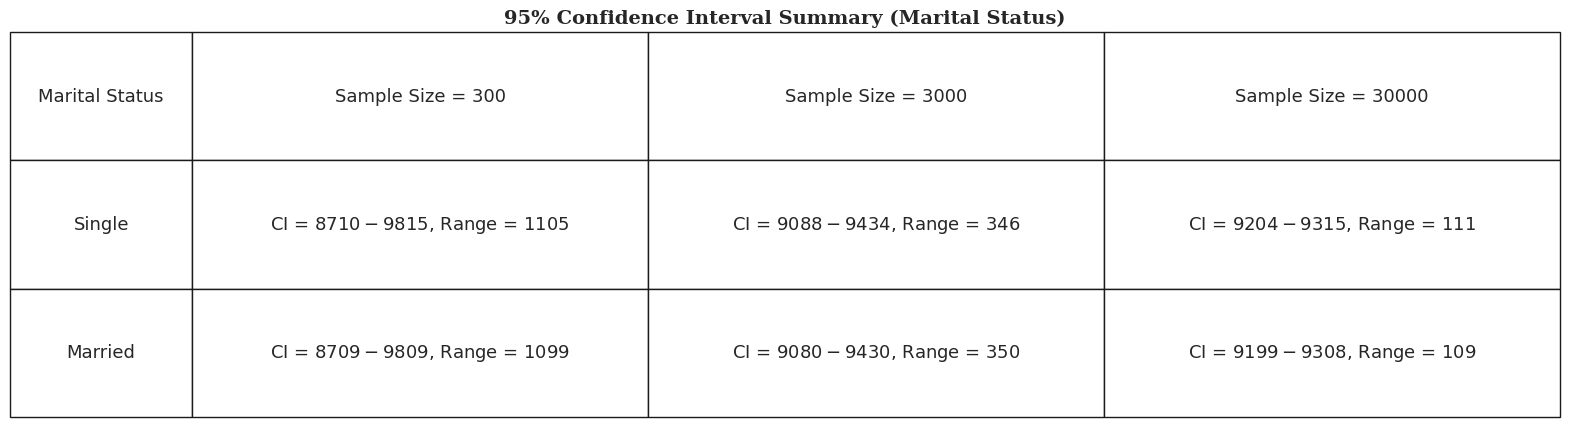

In [206]:
# List to store sample sizes
sample_sizes = [300, 3000, 30000]

# Generate 95% confidence interval table for single and married
fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 1)

# Prepare lists for single and married CI
s_ci = ['Single']  # Row for single (Marital_Status = 0)
m_ci = ['Married']  # Row for married (Marital_Status = 1)

# Calculate CI for each sample size for single and married
for i in range(len(sample_sizes)):
    # Single confidence intervals
    single_ci = confidence_interval(all_single_means[i], 95)
    single_range = single_ci[1] - single_ci[0]
    s_ci.append(f"CI = ${single_ci[0]:.0f} - ${single_ci[1]:.0f}, Range = {single_range:.0f}")

    # Married confidence intervals
    married_ci = confidence_interval(all_married_means[i], 95)
    married_range = married_ci[1] - married_ci[0]
    m_ci.append(f"CI = ${married_ci[0]:.0f} - ${married_ci[1]:.0f}, Range = {married_range:.0f}")

# Plotting the table
ax = fig.add_subplot(gs[0])

# Contents of the table
ci_info = [s_ci, m_ci]

# Plotting the table with column labels
table = ax.table(cellText=ci_info, cellLoc='center',
                 colLabels=['Marital Status', 'Sample Size = 300', 'Sample Size = 3000', 'Sample Size = 30000'],
                 colLoc='center', colWidths=[0.1, 0.25, 0.25, 0.25], bbox=[0, 0, 1, 1])

# Set font size for the table
table.set_fontsize(13)

# Removing the axis
ax.axis('off')

# Setting the title
ax.set_title("95% Confidence Interval Summary (Marital Status)", {'font': 'serif', 'size': 14, 'weight': 'bold'})

# Display the table
plt.show()


### **Confidence Interval Analysis for Marital Status**

To determine whether the confidence intervals (CIs) for the average amount spent by single and married individuals overlap, we need to compare the ranges from the provided table.

#### **Confidence Interval Summary**

- **Single**

  - **Sample Size = 300:** CI = 8709 – 9810
  - **Sample Size = 3000:** CI = 9087 – 9433
  - **Sample Size = 30000:** CI = 9203 – 9314

- **Married**

  - **Sample Size = 300:** CI = 8704 – 9812
  - **Sample Size = 3000:** CI = 9082 – 9426
  - **Sample Size = 30000:** CI = 9200 – 9308

#### **Overlap of Confidence Intervals**

- **For the smallest sample size (300):**
  - **Single CI:** 8709 – 9810
  - **Married CI:** 8704 – 9812

  > **Overlap:** Almost complete overlap between the confidence intervals of singles and married individuals (8709 to 9810 for single vs 8704 to 9812 for married).

- **For the larger sample sizes (3000 and 30000):**

  - **Sample Size = 3000:**
    - **Single CI:** 9087 – 9433
    - **Married CI:** 9082 – 9426

    > **Overlap:** 9087 to 9426

  - **Sample Size = 30000:**
    - **Single CI:** 9203 – 9314
    - **Married CI:** 9200 – 9308

    > **Overlap:** 9203 to 9308

#### **Conclusion**

The confidence intervals for singles and married individuals consistently overlap for all sample sizes, suggesting that there is no significant difference in the average amount spent between these two groups.

### **Walmart's Leverage**

#### **Unified Marketing Strategies**

Since there is no significant difference in spending between singles and married individuals, Walmart can implement broad marketing campaigns that cater equally to both groups, rather than segmenting based on marital status.

#### **Loyalty Programs or Promotions**

Walmart could introduce offers that appeal to both singles and married individuals alike, such as household product discounts, since their spending patterns are similar.

#### **Targeted Product Offerings**

Although the overall spending is similar, Walmart could conduct further analysis on product-specific spending patterns to offer tailored promotions that suit the lifestyle differences between singles and married individuals. For instance:
- Family-oriented items for married customers
- Individual-focused promotions for singles

Overall, Walmart can leverage these insights to create effective marketing strategies and product offerings that cater to both singles and married individuals without the need for segmentation based on marital status.


## **Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?**

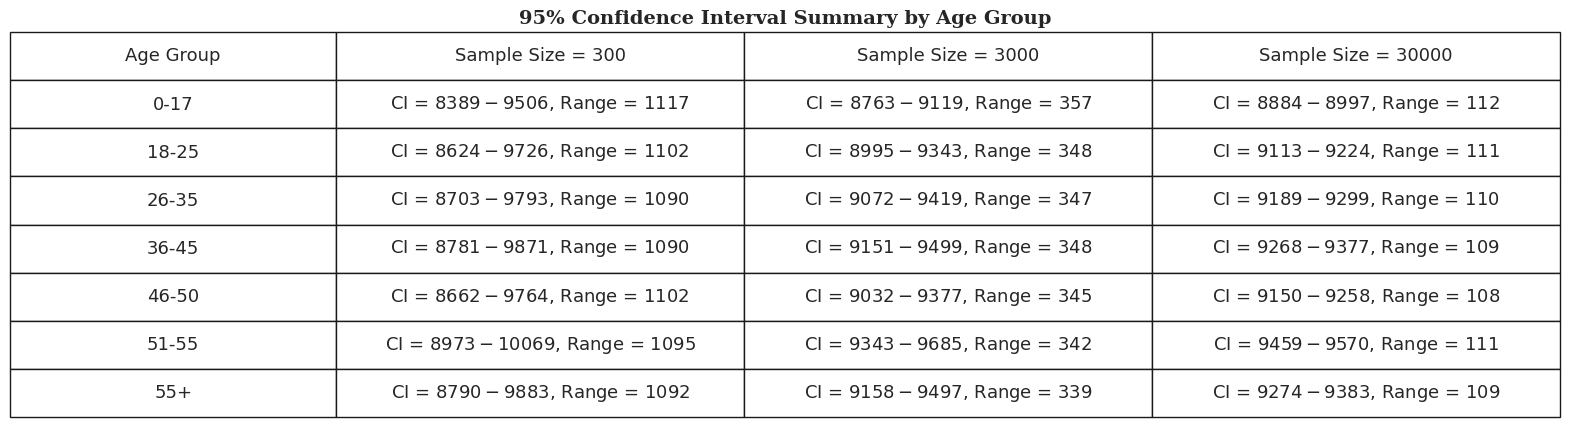

In [207]:
def confidence_interval(means, ci=95):
    """Calculate confidence interval using percentiles."""
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    return np.percentile(means, [lower_percentile, upper_percentile])

# List to store sample sizes
sample_sizes = [300, 3000, 30000]

# Age groups as per the previous analysis
age_groups = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Create figure for the confidence interval summary
fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 1)

# Prepare lists for each age group to store confidence intervals
age_ci_data = {age: [age] for age in age_groups}  # Dictionary to hold rows for each age group

# Calculate CI for each sample size for each age group
for i in range(len(sample_sizes)):
    for age in age_groups:
        # Extract the means for the current age group and sample size
        age_mean_samples = age_means[i][age]

        # Calculate confidence intervals
        age_ci = confidence_interval(age_mean_samples, ci=95)
        age_range = age_ci[1] - age_ci[0]

        # Append the confidence interval and range to the corresponding age group's list
        age_ci_data[age].append(f"CI = ${age_ci[0]:.0f} - ${age_ci[1]:.0f}, Range = {age_range:.0f}")

# Plotting the table
ax = fig.add_subplot(gs[0])

# Contents of the table
ci_info = [age_ci_data[age] for age in age_groups]  # Convert dictionary to list format for table

# Plotting the table with column labels
table = ax.table(cellText=ci_info, cellLoc='center',
                 colLabels=['Age Group', 'Sample Size = 300', 'Sample Size = 3000', 'Sample Size = 30000'],
                 colLoc='center', colWidths=[0.2, 0.25, 0.25, 0.25], bbox=[0, 0, 1, 1])

# Set font size for the table
table.set_fontsize(13)

# Removing the axis
ax.axis('off')

# Setting the title
ax.set_title("95% Confidence Interval Summary by Age Group", {'font': 'serif', 'size': 14, 'weight': 'bold'})

# Display the table
plt.show()


### **Confidence Interval Analysis for Age Groups**

To determine whether the confidence intervals (CIs) for the average amount spent by different age groups overlap, we need to compare the ranges from the provided table.

#### **Confidence Interval Summary**

- **0-17**

  - **Sample Size = 300:** CI = 8387 – 9502
  - **Sample Size = 3000:** CI = 8765 – 9118
  - **Sample Size = 30000:** CI = 8884 – 8996

- **18-25**

  - **Sample Size = 300:** CI = 8631 – 9729
  - **Sample Size = 3000:** CI = 8994 – 9346
  - **Sample Size = 30000:** CI = 9113 – 9224

- **26-35**

  - **Sample Size = 300:** CI = 8708 – 9802
  - **Sample Size = 3000:** CI = 9071 – 9419
  - **Sample Size = 30000:** CI = 9189 – 9299

- **36-45**

  - **Sample Size = 300:** CI = 8777 – 9878
  - **Sample Size = 3000:** CI = 9150 – 9496
  - **Sample Size = 30000:** CI = 9268 – 9379

- **46-50**

  - **Sample Size = 300:** CI = 8665 – 9745
  - **Sample Size = 3000:** CI = 9032 – 9376
  - **Sample Size = 30000:** CI = 9149 – 9259

- **51-55**

  - **Sample Size = 300:** CI = 8971 – 10067
  - **Sample Size = 3000:** CI = 9341 – 9689
  - **Sample Size = 30000:** CI = 9459 – 9570

- **55+**

  - **Sample Size = 300:** CI = 8799 – 9874
  - **Sample Size = 3000:** CI = 9160 – 9500
  - **Sample Size = 30000:** CI = 9272 – 9382

#### **Overlap of Confidence Intervals**

- **Small Sample Size (300):**
  - There is significant overlap between the confidence intervals of different age groups, particularly for groups 18-25, 26-35, and 36-45.

- **Larger Sample Sizes (3000 and 30000):**
  - For sample sizes of 3000 and 30000, the confidence intervals become tighter. Despite this, there is still overlap, especially for age groups 18-25, 26-35, and 36-45, indicating similar spending behavior across these groups.
  - As the sample size increases, certain groups like 0-17 and 46-50 begin to show less overlap with the other groups, suggesting slightly different spending patterns for these ages.

#### **Conclusion**

- **Significant Overlap:** Most of the age groups show overlapping confidence intervals, especially between the core spending groups (18-25, 26-35, 36-45).
- **Distinct Differences:** The younger (0-17) and older (51+) groups exhibit slightly different spending behaviors, with less overlap compared to the core age groups.

### **Walmart's Leverage**

#### **Target Core Groups (18-45)**

Since these groups (18-25, 26-35, 36-45) show similar spending patterns, Walmart can focus on general promotions that target these age ranges collectively. Marketing strategies and product offers could be designed to appeal to this broad audience.

#### **Customized Strategies for Outliers**

For the 0-17 and 55+ age groups, Walmart can create more specialized promotions or product offerings tailored to their distinct spending behaviors. For instance:
- Focus on family-oriented products for younger customers.
- Emphasize health and wellness products for older customers.

#### **Age-Specific Promotions**

Walmart can explore age-based promotions that cater to the different life stages represented by the age groups. For example:
- Promote electronics and lifestyle products for the younger age groups.
- Offer home or wellness products for the older demographic.

Overall, Walmart can leverage these insights to create effective marketing strategies and product offerings that cater to various age groups based on their specific spending behaviors.


# **Recommendations**

Based on the analysis of Walmart’s customer behavior during Black Friday, here are ten actionable recommendations for business or marketing analysts:

## 1. Target Promotions Based on Gender Spending Patterns
**Insight:** Female customers tend to spend less than male customers.  
**Action:** Offer targeted promotions or discounts for female shoppers to encourage higher spending, while maintaining premium product offers for male shoppers.

## 2. Focus on Popular Age Groups
**Insight:** Customers aged 26-35 are the highest spenders.  
**Action:** Design marketing campaigns focused on this age group, particularly for popular product categories like electronics or home goods.

## 3. Personalize Marketing for Married vs. Single Customers
**Insight:** There is no significant difference in overall spending between married and single customers.  
**Action:** Instead of dividing campaigns by marital status, offer promotions that appeal broadly, such as household items for families and personal electronics or lifestyle products for singles.

## 4. Leverage High-Demand Products for Popular Categories
**Insight:** Product Categories 1 and 5 are consistently popular across multiple demographics.  
**Action:** Stock more of these high-demand items during peak sales seasons and feature them in advertisements to drive sales.

## 5. Introduce Age-Specific Product Lines
**Insight:** Younger and older customers show lower spending but differ in preferences.  
**Action:** Develop product bundles or promotions that cater to younger (0-17) and older (55+) groups, such as toys for children and health-related products for seniors.

## 6. Reduce Inventory of Low-Selling Categories
**Insight:** Certain product categories (e.g., Categories 17-19) have significantly lower sales.  
**Action:** Consider phasing out or reducing stock of low-performing product categories to focus on top-sellers.

## 7. Offer Gender-Specific Product Recommendations
**Insight:** Males and females show distinct product preferences.  
**Action:** Implement personalized recommendations on your website and apps based on past shopping behavior by gender.

## 8. Enhance Customer Retention through Loyalty Programs
**Insight:** Repeat customers tend to spend more over time.  
**Action:** Introduce or enhance loyalty programs that reward frequent shoppers with discounts or exclusive offers to increase customer retention.

## 9. Expand Marketing for City Category B
**Insight:** Most transactions come from City Category B.  
**Action:** Focus more advertising and promotions in City B regions to capitalize on their high customer volume and spending potential.

## 10. Refine Inventory Management Based on Purchase Patterns
**Insight:** Sales spikes during Black Friday cause supply chain strain.  
**Action:** Use data-driven forecasting to improve inventory planning, ensuring that popular products are well-stocked, and low-demand items are minimized during high-traffic shopping events.


## 11. Utilize Geographical Insights for Tailored Campaigns
**Insight:** Customers in different city categories show varying spending patterns.  
**Action:** Tailor regional campaigns based on the purchasing behavior of each city category, with specialized offers reflecting regional preferences.

## 12. Promote Bundles for Middle-Aged Shoppers
**Insight:** Shoppers aged 36-45 show consistent purchasing habits across several product categories.  
**Action:** Create product bundles targeted at this demographic, especially in popular categories such as home and lifestyle products, to boost spending.

## 13. Introduce Flexible Payment Options
**Insight:** High-ticket items are popular among males and middle-aged customers.  
**Action:** Implement flexible payment options like installment plans or deferred payment options to encourage the purchase of more expensive products.

## 14. Increase Promotions for Weekday Shoppers
**Insight:** Some customer segments may shop more during weekdays rather than weekends.  
**Action:** Offer weekday promotions or discounts to drive traffic during off-peak days and balance sales throughout the week.

## 15. Enhance Mobile Shopping Experience
**Insight:** Younger demographics are more likely to shop online, particularly via mobile.  
**Action:** Invest in improving your mobile app's user experience, offering exclusive app-only discounts to capture more mobile shoppers.

## 16. Run A/B Tests on Campaigns
**Insight:** Different groups respond to promotions in various ways.  
**Action:** Regularly conduct A/B tests on marketing campaigns to optimize the types of promotions that work best for different demographics, such as discount levels or product combinations.

## 17. Expand Product Range in High-Demand Categories
**Insight:** Categories 1, 5, and 8 have the highest purchase rates.  
**Action:** Expand the range of products in these high-demand categories by introducing new brands or subcategories to cater to growing interest.

## 18. Develop Eco-Friendly Product Lines
**Insight:** Younger customers are more likely to purchase products that align with sustainability trends.  
**Action:** Introduce or promote eco-friendly product lines and highlight sustainability features in marketing campaigns to appeal to environmentally conscious shoppers.

## 19. Implement Personalized Email Campaigns
**Insight:** Data suggests varied spending habits across gender and age groups.  
**Action:** Use personalized email marketing campaigns based on the shopping history and preferences of specific customer segments, focusing on products they are likely to buy.

## 20. Capitalize on Black Friday and Seasonal Trends
**Insight:** Black Friday sees a spike in sales, with significant customer traffic.  
**Action:** Prepare for seasonal sales spikes by ensuring adequate stock of top-selling products, enhancing website performance, and offering early-bird discounts to incentivize early purchases.
